# Avaliação docente em fuzzy
---
### Autor: Matheus Felipe Paixão Honorato
matheuspaixaohonorato@gmail.com
### Sistema desenvolvido para trabalho de conclusão de curso - Sistemas de Informação | Unimontes
### Objetivo: avaliar docentes do centro de educação a distância da Unimontes por meio da lógica fuzzy

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
#os parametros utilizados definem funcoes triangulares

#parametros variáveis de entrada - funcões iguais para todas as variáveis de entrada por isso definidas somente uma vez

parametros_funcao_entrada_baixo = [3, 5, 10]
parametros_funcao_entrada_medio = [3, 8, 13]
parametros_funcao_entrada_alto = [6, 9, 16]

#parametros variável de saída

parametros_funcao_saida_baixo = [0, 5, 10]
parametros_funcao_saida_medio = [3, 8, 13]
parametros_funcao_saida_alto = [6, 9, 16]

#base de regras

#constantes
BAIXO = 0
MEDIO = 1
ALTO = 2

#antecedente, antecedente, antecedente, antecedente, consequente
regras = [
    [BAIXO, BAIXO, BAIXO, BAIXO, BAIXO],
    [BAIXO, MEDIO, BAIXO, MEDIO, BAIXO]
]

In [106]:
#geranado lista de valores eixo x das variaveis de entrada

valores_eixo_x_variaveis_de_entrada_funcao_baixo = np.arange(parametros_funcao_entrada_baixo[0], parametros_funcao_entrada_baixo[2], 0.1)
valores_eixo_x_variaveis_de_entrada_funcao_medio = np.arange(parametros_funcao_entrada_medio[0], parametros_funcao_entrada_medio[2], 0.1)
valores_eixo_x_variaveis_de_entrada_funcao_alto = np.arange(parametros_funcao_entrada_alto[0], parametros_funcao_entrada_alto[2], 0.1)

#geranado lista de valores eixo x das variavel de saída

valores_eixo_x_variavel_de_saida_funcao_baixo = np.arange(parametros_funcao_saida_baixo[0], parametros_funcao_saida_baixo[2], 0.1)
valores_eixo_x_variavel_de_saida_funcao_medio = np.arange(parametros_funcao_saida_medio[0], parametros_funcao_saida_medio[2], 0.1)
valores_eixo_x_variavel_de_saida_funcao_alto = np.arange(parametros_funcao_saida_alto[0], parametros_funcao_saida_alto[2], 0.1)

In [107]:
#definição da função de pertinência triangular

def triangular(x, parametros):
    a = parametros[0]
    b = parametros[1]
    c = parametros[2]
    resultado = max(min((x-a)/(b-a),(c-x)/(c-b)), 0)
    return resultado


Text(0.5,1,'Variável de entrada')

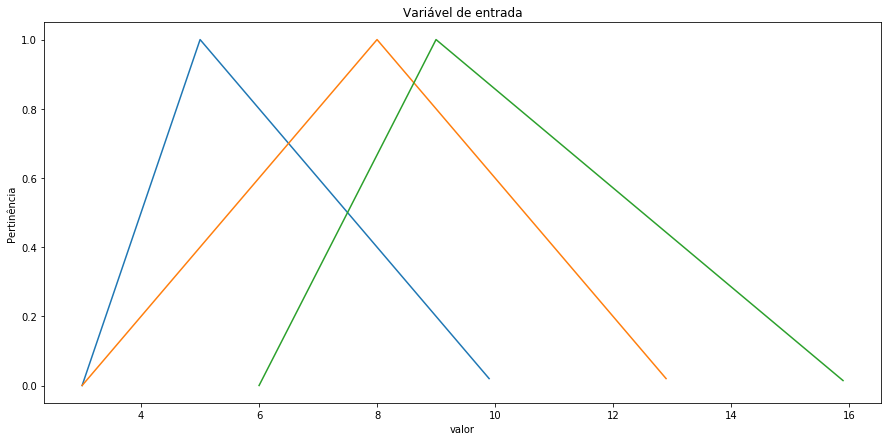

In [108]:
#listas de pertinencias variáveis de entrada 

valores_eixo_y_variaveis_de_entrada_funcao_baixo = []
valores_eixo_y_variaveis_de_entrada_funcao_medio = []
valores_eixo_y_variaveis_de_entrada_funcao_alto = []

#plotando gráfico variáveis de entrada

plt.figure(figsize=(15,7))

#inserindo valores em listas de pertinencia de variáveis de entrada

for x_atual in valores_eixo_x_variaveis_de_entrada_funcao_baixo:
    valores_eixo_y_variaveis_de_entrada_funcao_baixo.append(triangular(x_atual, parametros_funcao_entrada_baixo))

plot(valores_eixo_x_variaveis_de_entrada_funcao_baixo, valores_eixo_y_variaveis_de_entrada_funcao_baixo)
    
for x_atual in valores_eixo_x_variaveis_de_entrada_funcao_medio:
    valores_eixo_y_variaveis_de_entrada_funcao_medio.append(triangular(x_atual, parametros_funcao_entrada_medio))

plot(valores_eixo_x_variaveis_de_entrada_funcao_medio, valores_eixo_y_variaveis_de_entrada_funcao_medio)
    
for x_atual in valores_eixo_x_variaveis_de_entrada_funcao_alto:
    valores_eixo_y_variaveis_de_entrada_funcao_alto.append(triangular(x_atual, parametros_funcao_entrada_alto))
    
plot(valores_eixo_x_variaveis_de_entrada_funcao_alto, valores_eixo_y_variaveis_de_entrada_funcao_alto)

xlabel("valor")
ylabel("Pertinência")
title("Variável de entrada")

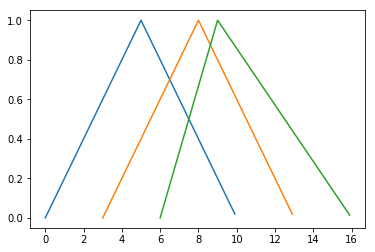

In [109]:
#lista de pertinencias variável de saída 

valores_eixo_y_variavel_de_saida_funcao_baixo = []
valores_eixo_y_variavel_de_saida_funcao_medio = []
valores_eixo_y_variavel_de_saida_funcao_alto = []

#inserindo valores em listas de pertinencia de variável de saida

for x_atual in valores_eixo_x_variavel_de_saida_funcao_baixo:
    valores_eixo_y_variavel_de_saida_funcao_baixo.append(triangular(x_atual, parametros_funcao_saida_baixo))
    
plot(valores_eixo_x_variavel_de_saida_funcao_baixo, valores_eixo_y_variavel_de_saida_funcao_baixo)

for x_atual in valores_eixo_x_variavel_de_saida_funcao_medio:
    valores_eixo_y_variavel_de_saida_funcao_medio.append(triangular(x_atual, parametros_funcao_saida_medio))
    
plot(valores_eixo_x_variavel_de_saida_funcao_medio, valores_eixo_y_variavel_de_saida_funcao_medio)

for x_atual in valores_eixo_x_variavel_de_saida_funcao_alto:
    valores_eixo_y_variavel_de_saida_funcao_alto.append(triangular(x_atual, parametros_funcao_saida_alto))

plot(valores_eixo_x_variavel_de_saida_funcao_alto, valores_eixo_y_variavel_de_saida_funcao_alto)


In [ ]:
def avalia_regras(regras):
    